# DataAnalysis

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

data = pd.read_csv('data.csv', delimiter=';')

## Time Metric

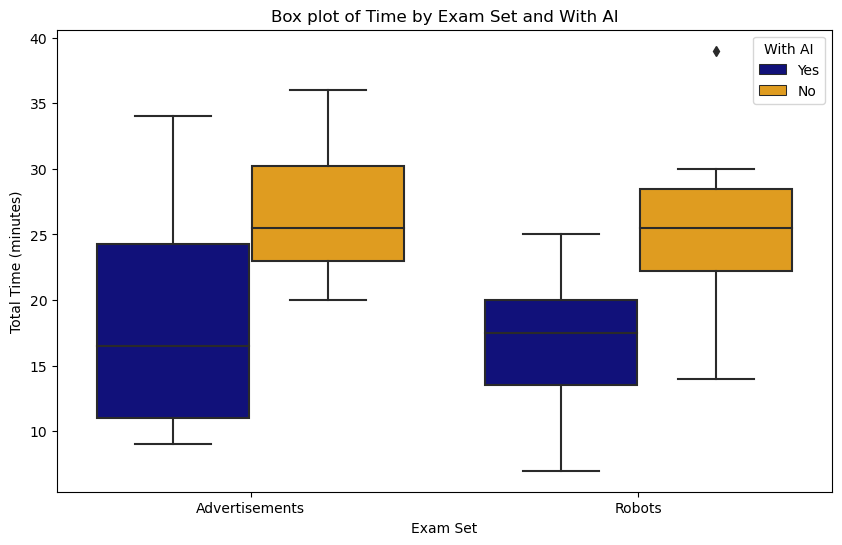

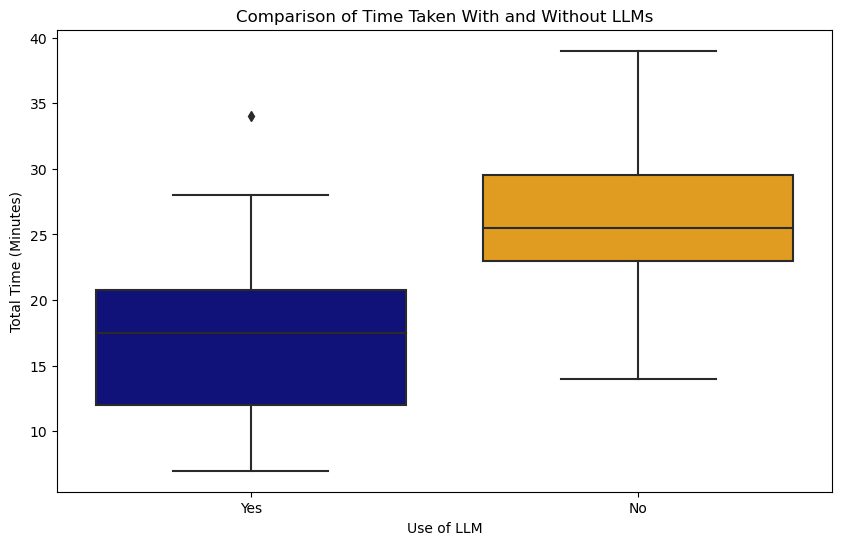

In [22]:
# Define a function to calculate total time spent
def calculate_total_time(row):
    total_time = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')  # Split based on space to separate time and binary indicator
            if len(parts) == 2:
                time_str = parts[0]  # Time is always the first part
            else:
                time_str = task  # Handle case where there's only a time value
            total_time += int(time_str)
    return total_time

task_columns = data.iloc[:, 3:11]

# Adjusted function applications to the correct column slice
data['Total_Time'] = task_columns.apply(calculate_total_time, axis=1)

# Convert total time from seconds to minutes and round
data['Total_Time_Minutes'] = (data['Total_Time'] / 60).round(0)

# Filter the DataFrame to include only rows where 'With AI' is 'Yes' or 'No'
data_with_ai = data[data['With AI'] == 'Yes']

data_filtered = data[data['With AI'].isin(['Yes', 'No'])]

# Create box plots for time
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total_Time_Minutes', hue='With AI', data=data_filtered,
            palette={'Yes': 'darkblue', 'No': 'orange'})  # Apply custom colors
plt.title('Box plot of Time by Exam Set and With AI')
plt.xlabel('Exam Set')
plt.ylabel('Total Time (minutes)')
plt.legend(title='With AI')  # Optional: to add a title to the legend
plt.show()

# Create box plots for comparison of time taken with and without LLMs
plt.figure(figsize=(10, 6))
sns.boxplot(x='With AI', y='Total_Time_Minutes', data=data,
            palette={'Yes': 'darkblue', 'No': 'orange'})  # Apply custom colors
plt.title('Comparison of Time Taken With and Without LLMs')
plt.xlabel('Use of LLM')
plt.ylabel('Total Time (Minutes)')
plt.show()

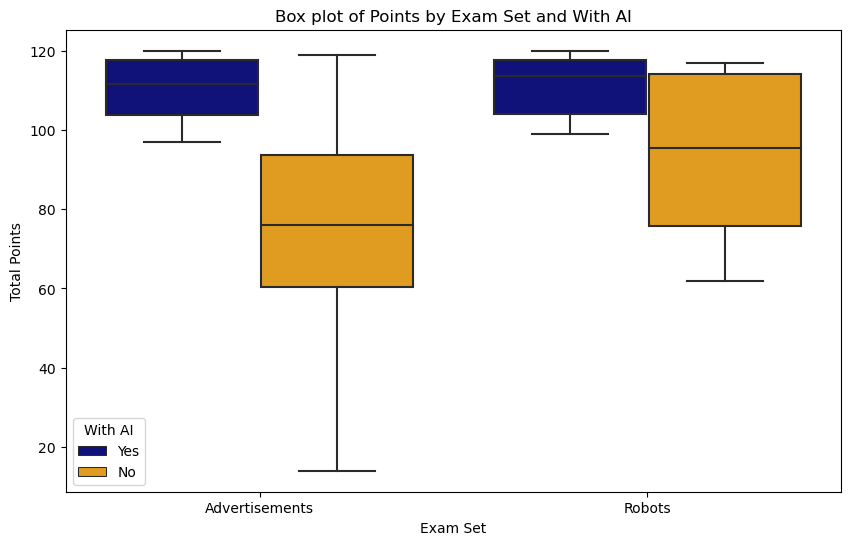

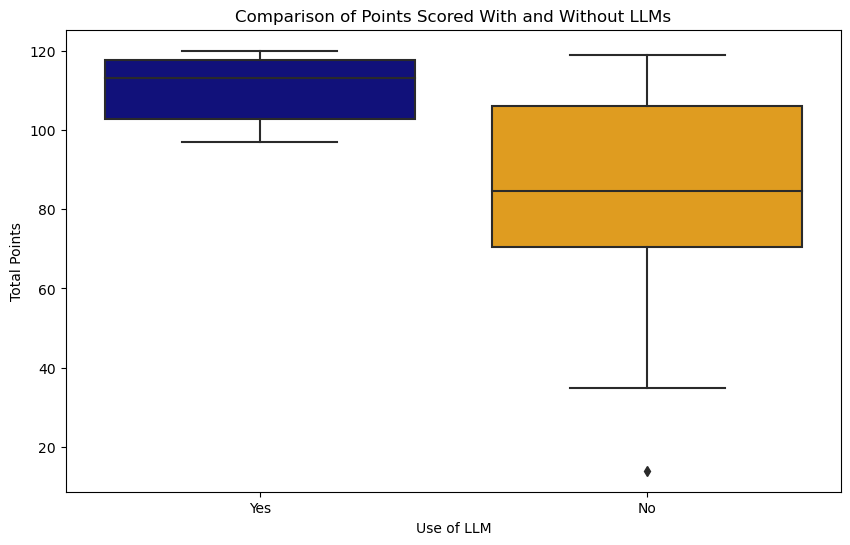

In [23]:
# Assuming 'Total Points' column is correctly calculated and exists in your dataframe
# Create box plots for points
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total Points', hue='With AI', data=data_filtered,
            palette={'Yes': 'darkblue', 'No': 'orange'})  # Apply custom colors
plt.title('Box plot of Points by Exam Set and With AI')
plt.xlabel('Exam Set')
plt.ylabel('Total Points')
plt.legend(title='With AI')  # Add a title to the legend for clarity
plt.show()

# Create box plots for comparison of points scored with and without LLMs
plt.figure(figsize=(10, 6))
sns.boxplot(x='With AI', y='Total Points', data=data,
            palette={'Yes': 'darkblue', 'No': 'orange'})  # Apply custom colors
plt.title('Comparison of Points Scored With and Without LLMs')
plt.xlabel('Use of LLM')
plt.ylabel('Total Points')
plt.show()


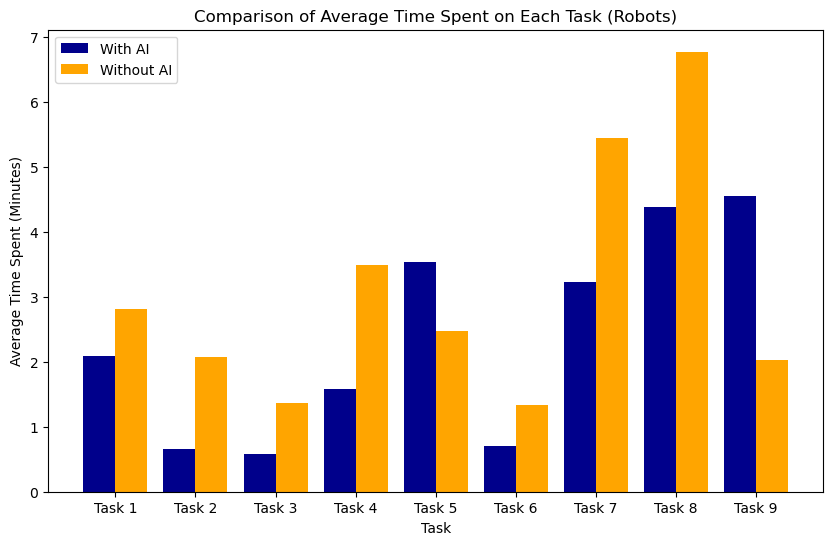

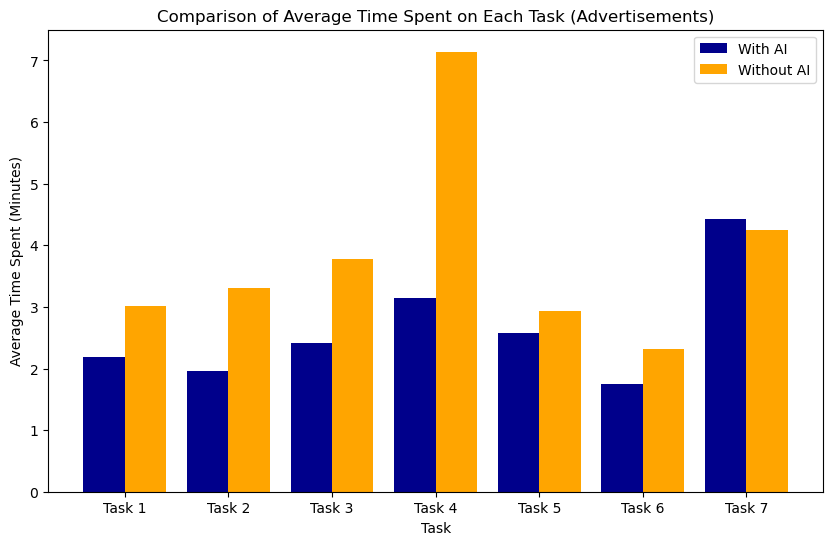

In [24]:
# Function to calculate average time spent per task
def calculate_average_time(task_series):
    total_time = 0
    count = 0
    for task in task_series:
        if pd.isna(task):  # Skip NaN values
            continue
        parts = task.split(' ')
        if len(parts) == 2:
            time_str = parts[0]
        else:
            time_str = task
        total_time += int(time_str)
        count += 1
    if count == 0:
        return np.nan  # Avoid division by zero
    return total_time / count / 60  # Convert to minutes

# Apply the function to calculate average time spent per task for both sets, making sure to only use the columns for Tasks 1-7 for advertisements
avg_time_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)
avg_time_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')].iloc[:, 3:12].apply(calculate_average_time, axis=0)

avg_time_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:10].apply(calculate_average_time, axis=0)  # Only tasks 1-7
avg_time_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')].iloc[:, 3:10].apply(calculate_average_time, axis=0)  # Only tasks 1-7

# Extract task names
task_names_robots = [f'Task {i}' for i in range(1, 10)]
task_names_ads = [f'Task {i}' for i in range(1, 8)]  # Only tasks 1-7

# Plot for Robots
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in range(1, 10)], avg_time_with_ai_robots, width=0.4, color='darkblue', label='With AI')
plt.bar([i + 0.2 for i in range(1, 10)], avg_time_without_ai_robots, width=0.4, color='orange', label='Without AI')
plt.xlabel('Task')
plt.ylabel('Average Time Spent (Minutes)')
plt.title('Comparison of Average Time Spent on Each Task (Robots)')
plt.xticks(range(1, 10), task_names_robots)
plt.legend()
plt.show()

# Plot for Advertisements
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in range(1, 8)], avg_time_with_ai_ads, width=0.4, color='darkblue', label='With AI')
plt.bar([i + 0.2 for i in range(1, 8)], avg_time_without_ai_ads, width=0.4, color='orange', label='Without AI')
plt.xlabel('Task')
plt.ylabel('Average Time Spent (Minutes)')
plt.title('Comparison of Average Time Spent on Each Task (Advertisements)')
plt.xticks(range(1, 8), task_names_ads)  # Use the task names for tasks 1-7
plt.legend()
plt.show()


## Split data for each exam set

In [25]:
robots_with_ai = data.loc[(data['Exam Set'] == 'Robots') & (data['With AI'] == 'Yes')]

robots_without_ai = data.loc[(data['Exam Set'] == 'Robots') & (data['With AI'] == 'No')]

ads_with_ai = data.loc[(data['Exam Set'] == 'Advertisements') & (data['With AI'] == 'Yes')]

ads_without_ai = data.loc[(data['Exam Set'] == 'Advertisements') & (data['With AI'] == 'No')]

In [26]:
total_time_with_ai_robots = robots_with_ai['Total_Time_Minutes'].sum()
total_time_without_ai_robots = robots_without_ai['Total_Time_Minutes'].sum()

total_time_with_ai_ads = ads_with_ai['Total_Time_Minutes'].sum()
total_time_without_ai_ads = ads_without_ai['Total_Time_Minutes'].sum()

# Calculate the percentage difference for each category
percent_difference_robots = (((total_time_without_ai_robots - total_time_with_ai_robots) / total_time_with_ai_robots) * 100).round(2)
percent_difference_ads = (((total_time_without_ai_ads - total_time_with_ai_ads) / total_time_with_ai_ads) * 100).round(2)

print("Total time spent on Robots without AI:", total_time_without_ai_robots, "minutes")
print("Total time spent on Robots with AI:", total_time_with_ai_robots, "minutes")
print("Total time used on tasks without AI in Robots are", percent_difference_robots, "% longer than with AI")

print("\nTotal time spent on Advertisements without AI:", total_time_without_ai_ads, "minutes")
print("Total time spent on Advertisements with AI:", total_time_with_ai_ads, "minutes")
print("Total time used on tasks without AI in Advertisements are", percent_difference_ads, "% longer than with AI")



Total time spent on Robots without AI: 302.0 minutes
Total time spent on Robots with AI: 168.0 minutes
Total time used on tasks without AI in Robots are 79.76 % longer than with AI

Total time spent on Advertisements without AI: 263.0 minutes
Total time spent on Advertisements with AI: 217.0 minutes
Total time used on tasks without AI in Advertisements are 21.2 % longer than with AI


## Statistical significant for time metric

In [27]:
# For robots with AI
times_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')]['Total_Time_Minutes'].values

# For robots without AI
times_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')]['Total_Time_Minutes'].values

# Conduct the t-test
t_stat, p_value = ttest_ind(times_with_ai_robots, times_without_ai_robots)

print(f"T-statistic for exam set with Robots: {t_stat}, P-value: {p_value}")

# For robots with AI
times_with_ai_adv = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')]['Total_Time_Minutes'].values

# For robots without AI
times_without_ai_adv = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')]['Total_Time_Minutes'].values

# Conduct the t-test
t_stat, p_value = ttest_ind(times_with_ai_adv, times_without_ai_adv)

print(f"T-statistic for exam set with Advertisements: {t_stat}, P-value: {p_value}")

T-statistic for exam set with Robots: -3.2140023131734092, P-value: 0.004354741375411098
T-statistic for exam set with Advertisements: -2.7124971785843983, P-value: 0.013406047111066284


## Code correctness metric

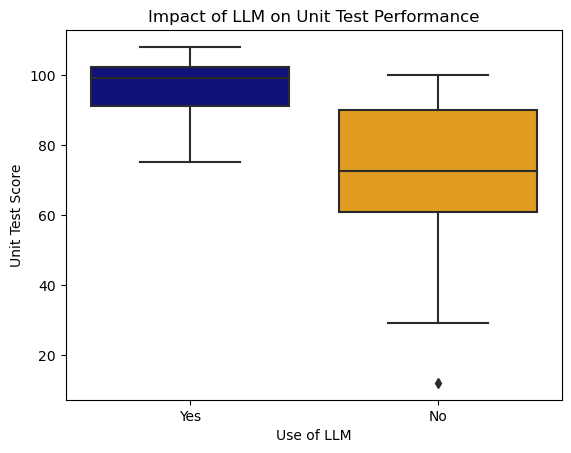

In [28]:
palette = {"Yes": "darkblue", "No": "orange"}  # Color mapping for 'With AI'

sns.boxplot(data=data, x='With AI', y='Unit Test', palette=palette)
plt.title('Impact of LLM on Unit Test Performance')
plt.xlabel('Use of LLM')
plt.ylabel('Unit Test Score')  # Assuming 'Unit Test Score' is the intended meaning
plt.show()

## Prompt metric

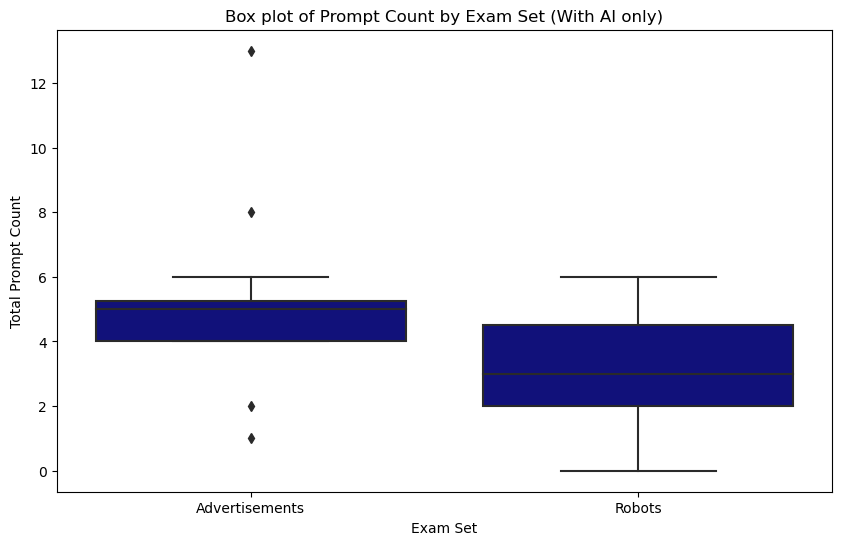

In [29]:
# Define a function to calculate total prompt count
def calculate_total_prompt(row):
    total_prompt = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')  # Split based on space to separate time and binary indicator
            if len(parts) == 2:
                prompt_str = parts[1]  # Binary indicator (prompt) is the second part
                total_prompt += int(prompt_str)
    return total_prompt

task_columns = data.iloc[:, 3:11]

data['Total_Prompt_Count'] = task_columns.apply(calculate_total_prompt, axis=1)

# Filter the DataFrame to include only rows where 'With AI' is 'Yes' or 'No'
data_with_ai = data[data['With AI'] == 'Yes']

data_filtered = data[data['With AI'].isin(['Yes', 'No'])]

# Create box plots for prompt count for exams with AI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total_Prompt_Count', data=data_with_ai, color='darkblue')  # Set color directly
plt.title('Box plot of Prompt Count by Exam Set (With AI only)')
plt.xlabel('Exam Set')
plt.ylabel('Total Prompt Count')
plt.show()

## Points per task

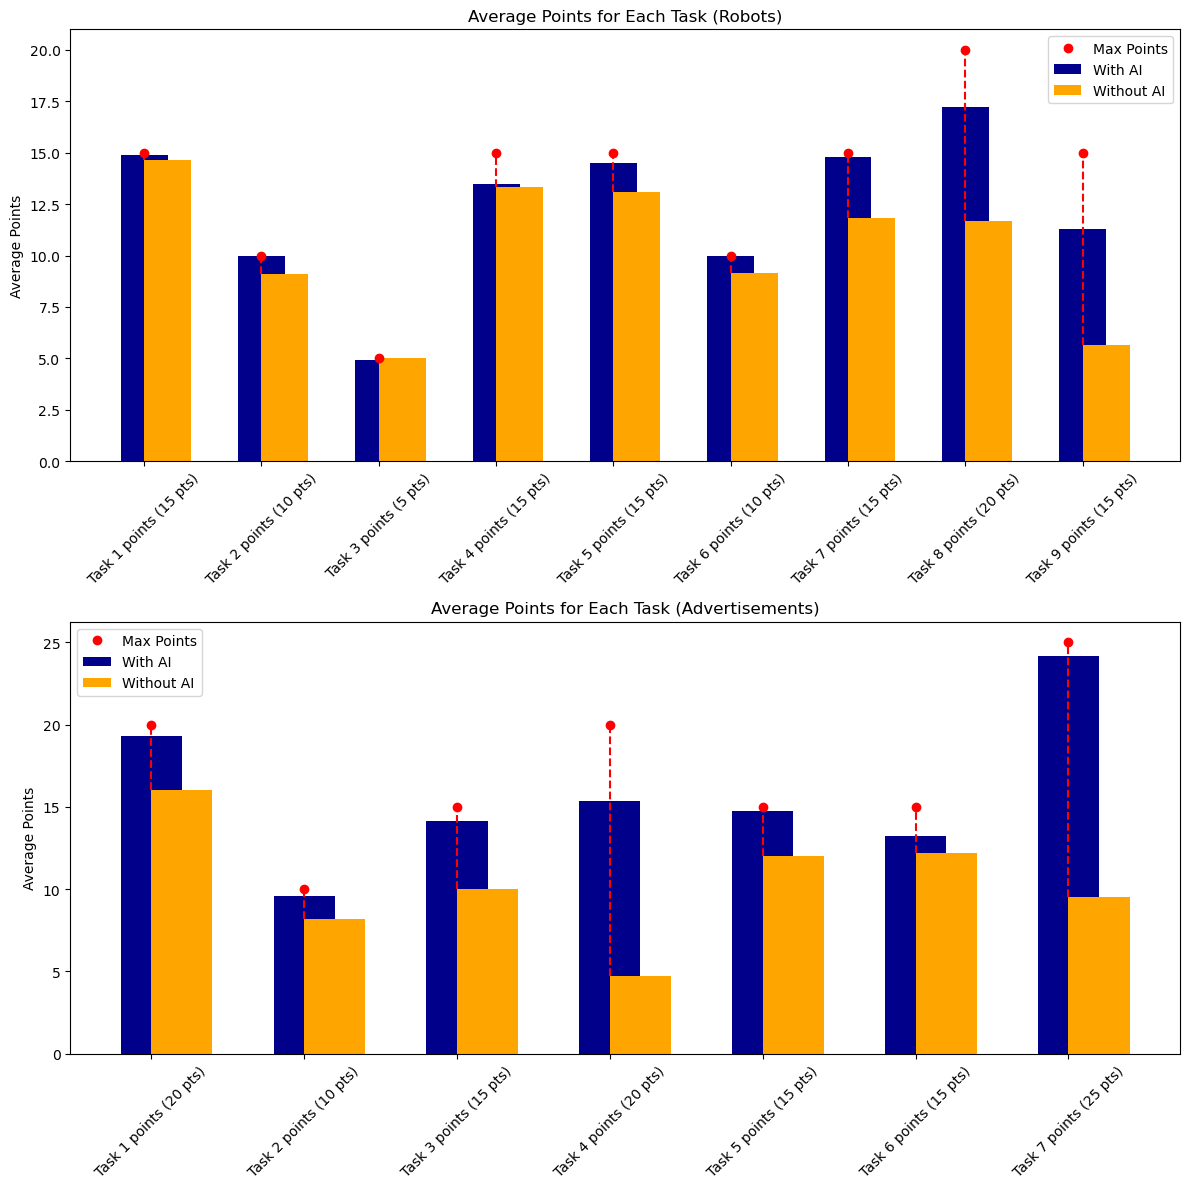

In [30]:
# Filtering data for each set
data_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')]
data_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')]
data_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')]
data_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')]

# Assuming tasks are from Task 1 to Task 9 for Robots and Task 1 to Task 7 for Advertisements
task_columns_robots = ['Task 1 points', 'Task 2 points', 'Task 3 points', 'Task 4 points', 'Task 5 points', 'Task 6 points', 'Task 7 points', 'Task 8 points', 'Task 9 points']
task_columns_adv = ['Task 1 points', 'Task 2 points', 'Task 3 points', 'Task 4 points', 'Task 5 points', 'Task 6 points', 'Task 7 points']

# Calculating averages
avg_points_with_ai_robots = data_with_ai_robots[task_columns_robots].mean()
avg_points_without_ai_robots = data_without_ai_robots[task_columns_robots].mean()
avg_points_with_ai_ads = data_with_ai_ads[task_columns_adv].mean()
avg_points_without_ai_ads = data_without_ai_ads[task_columns_adv].mean()

# Maximum points for each task
max_points_per_task_robots = [15, 10, 5, 15, 15, 10, 15, 20, 15]
max_points_per_task_advertisement = [20, 10, 15, 20, 15, 15, 25]

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Function to add max points to plots
def add_max_points(ax, task_columns, avg_with_ai, avg_without_ai, max_points):
    # Using consistent colors: dark blue for 'With AI', orange for 'Without AI'
    bars_with_ai = ax.bar(task_columns, avg_with_ai, width=0.4, label='With AI', color='darkblue', align='center')
    bars_without_ai = ax.bar(task_columns, avg_without_ai, width=0.4, label='Without AI', color='orange', align='edge')
    for i, max_point in enumerate(max_points):
        ax.plot([i], [max_point], 'ro', label='Max Points' if i == 0 else "")  # Only label once
        ax.vlines(i, ymin=min(avg_with_ai[i], avg_without_ai[i]), ymax=max_point, color='r', linestyle='--')

# Robots
add_max_points(axs[0], task_columns_robots, avg_points_with_ai_robots, avg_points_without_ai_robots, max_points_per_task_robots)
axs[0].set_ylabel('Average Points')
axs[0].set_title('Average Points for Each Task (Robots)')
axs[0].legend()

# Advertisements
add_max_points(axs[1], task_columns_adv, avg_points_with_ai_ads, avg_points_without_ai_ads, max_points_per_task_advertisement)
axs[1].set_ylabel('Average Points')
axs[1].set_title('Average Points for Each Task (Advertisements)')
axs[1].legend()

# Custom x-axis labels with max points
axs[0].set_xticks(range(len(task_columns_robots)))
axs[0].set_xticklabels([f"{tc} ({mp} pts)" for tc, mp in zip(task_columns_robots, max_points_per_task_robots)], rotation=45)
axs[1].set_xticks(range(len(task_columns_adv)))
axs[1].set_xticklabels([f"{tc} ({mp} pts)" for tc, mp in zip(task_columns_adv, max_points_per_task_advertisement)], rotation=45)

plt.tight_layout()
plt.show()


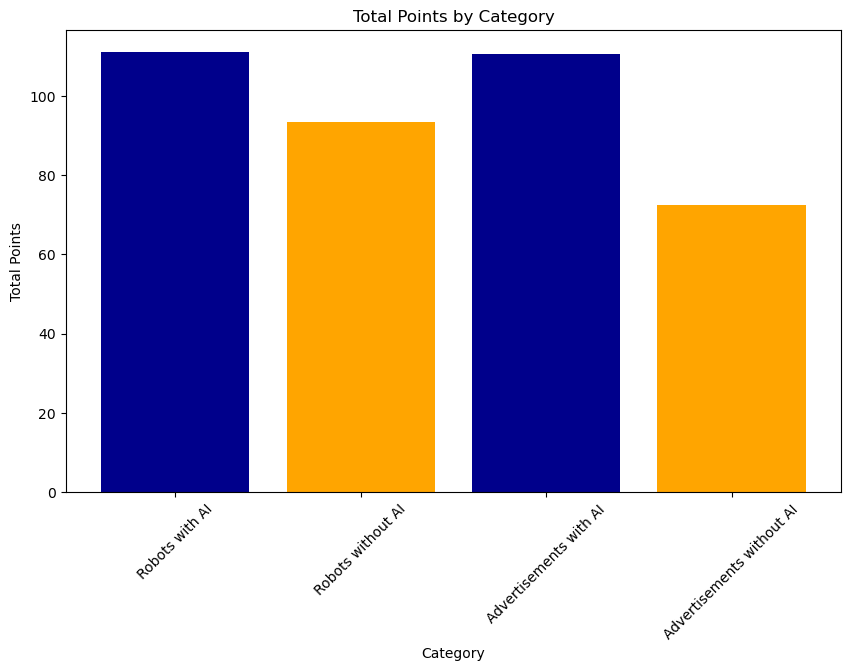

In [31]:
# Calculate average points for each category
robots_with_ai_avg_points = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Robots')]['Total Points'].mean()
robots_without_ai_avg_points = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Robots')]['Total Points'].mean()
ads_with_ai_avg_points = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Advertisements')]['Total Points'].mean()
ads_without_ai_avg_points = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Advertisements')]['Total Points'].mean()

totals = [
    robots_with_ai_avg_points,
    robots_without_ai_avg_points,
    ads_with_ai_avg_points,
    ads_without_ai_avg_points
]

# Create a list of category names
categories = [
    'Robots with AI',
    'Robots without AI',
    'Advertisements with AI',
    'Advertisements without AI'
]

# Plotting the total points by category
plt.figure(figsize=(10, 6))
colors = ['darkblue', 'orange', 'darkblue', 'orange']  # Consistent color scheme
plt.bar(categories, totals, color=colors)
plt.xlabel('Category')
plt.ylabel('Total Points')
plt.title('Total Points by Category')
plt.xticks(rotation=45)
plt.show()

## Grade Metric

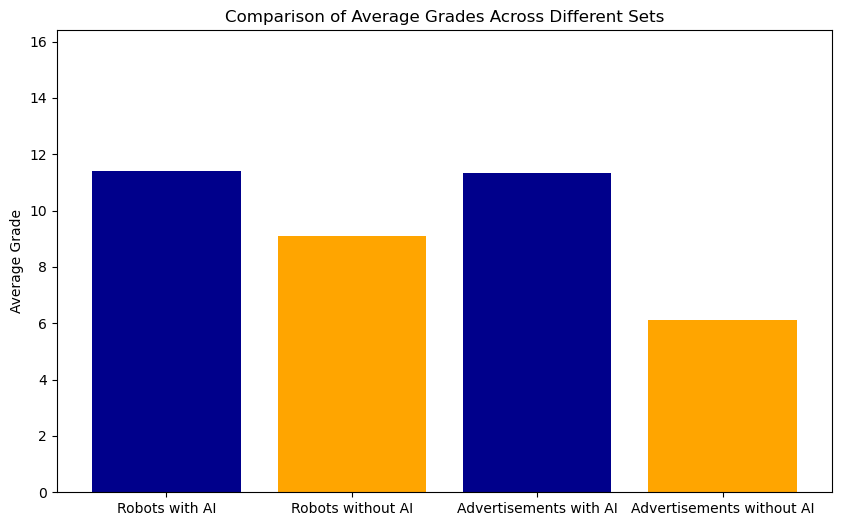

In [32]:
# Calculating average grades
avg_grade_with_ai_robots = data_with_ai_robots['Grade'].mean()
avg_grade_without_ai_robots = data_without_ai_robots['Grade'].mean()
avg_grade_with_ai_ads = data_with_ai_ads['Grade'].mean()
avg_grade_without_ai_ads = data_without_ai_ads['Grade'].mean()

# Preparing data for plotting
categories = ['Robots with AI', 'Robots without AI', 'Advertisements with AI', 'Advertisements without AI']
average_grades = [avg_grade_with_ai_robots, avg_grade_without_ai_robots, avg_grade_with_ai_ads, avg_grade_without_ai_ads]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['darkblue', 'orange', 'darkblue', 'orange']
bars = ax.bar(categories, average_grades, color=colors)
ax.set_ylabel('Average Grade')
ax.set_title('Comparison of Average Grades Across Different Sets')
ax.set_ylim(0, max(average_grades) + 5)  # Adjust y-limit for better visualization

plt.show()

## Plots for discussion

### Background information

### Filtering for backgroundinformation

In [33]:
# Filter the data to include only every second row starting from the first one
filtered_data = data.iloc[::2]

# Convert specified columns to numeric, errors='coerce' will set non-convertible values to NaN
column_names = [
    'How many years of developer experience do you have?',
    'How many years of experience do you have with Java?',
    'How many months is it since you coded in Java?',
    'How many years of experience do you have with Visual Studio Code?',
    'How much experience in years do you have in using an LLM(ChatGPT, CoPilot, Gemini)?'
]

for column in column_names:
    filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')

# Rename dictionary for columns
rename_dict = {
    'How many years of developer experience do you have?': 'Dev Exp (Years)',
    'How many years of experience do you have with Java?': 'Java Exp (Years)',
    'How many months is it since you coded in Java?': 'Java Coding Gap (Years)',
    'How many years of experience do you have with Visual Studio Code?': 'VS Code Exp (Years)',
    'How much experience in years do you have in using an LLM(ChatGPT, CoPilot, Gemini)?': 'LLM Exp (Years)'
}

# Rename the columns in the DataFrame
filtered_data.rename(columns=rename_dict, inplace=True)

# Now perform numeric conversion for the renamed columns
for column in rename_dict.values():  # Using new column names
    filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')

C:\Users\sverr\AppData\Local\Temp\ipykernel_19020\1554073757.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')
C:\Users\sverr\AppData\Local\Temp\ipykernel_19020\1554073757.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns=rename_dict, inplace=True)
C:\Users\sverr\AppData\Local\Temp\ipykernel_19020\1554073757.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

### Difference between Operating system and 'Total Time Minutes

In [34]:
# Calculate the total time spent on tasks for each operating system
total_points_windows = filtered_data[filtered_data['Which operating system do you usually use'] == 'Windows']['Total Points'].sum()
total_time_windows = filtered_data[filtered_data['Which operating system do you usually use'] == 'Windows']['Total_Time_Minutes'].sum()
total_points_macos = filtered_data[filtered_data['Which operating system do you usually use'] == 'MacOS']['Total Points'].sum()
total_time_macos = filtered_data[filtered_data['Which operating system do you usually use'] == 'MacOS']['Total_Time_Minutes'].sum()

# Print out the total time in minutes per operating system
print("Total time spent on tasks for Windows users:", total_time_windows)
print("Total time spent on tasks for MacOS users:", total_time_macos)
print("Total points on tasks for Windows users:", total_points_windows)
print("Total points on tasks for MacOS users:", total_points_macos) 

Total time spent on tasks for Windows users: 123.0
Total time spent on tasks for MacOS users: 297.0
Total points on tasks for Windows users: 594
Total points on tasks for MacOS users: 1294


### Correlation metrics 

#### Java Experience and Total Points

In [35]:
# Converting 'Java Coding Gap' from months to years
data['Java Coding Gap (Years)'] = data['How many months is it since you coded in Java?'] / 12

# Calculate the correlation for 'Java Exp (Years)'
correlation_java_exp = data['How many years of experience do you have with Java?'].corr(data['Total Points'])
print("Correlation between Java Experience and Total Points:", correlation_java_exp)

# Calculate the correlation for 'Java Coding Gap (Years)'
correlation_java_gap = data['Java Coding Gap (Years)'].corr(data['Total Points'])
print("Correlation between Java Coding Gap and Total Points:", correlation_java_gap)

Correlation between Java Experience and Total Points: -0.3104515711381904
Correlation between Java Coding Gap and Total Points: -0.31292833383403856


In [36]:
import scipy.stats as stats
groups = {
    'Robots with AI': robots_with_ai,
    'Robots without AI': robots_without_ai,
    'Advertisements with AI': ads_with_ai,
    'Advertisements without AI': ads_without_ai
}

for name, group in groups.items():
    mean_time = np.mean(group['Total_Time_Minutes'])
    std_dev_time = np.std(group['Total_Time_Minutes'], ddof=1)
    confidence_interval = stats.norm.interval(0.95, loc=mean_time, scale=std_dev_time / np.sqrt(len(group['Total_Time_Minutes'])))

    print(f"{name} - Mean Time: {mean_time:.2f} minutes")
    print(f"{name} - Standard Deviation: {std_dev_time:.2f} minutes")
    print(f"{name} - 95% Confidence Interval: {confidence_interval}\n")

Robots with AI - Mean Time: 16.80 minutes
Robots with AI - Standard Deviation: 5.20 minutes
Robots with AI - 95% Confidence Interval: (13.575477005610686, 20.024522994389315)

Robots without AI - Mean Time: 25.17 minutes
Robots without AI - Standard Deviation: 6.71 minutes
Robots without AI - 95% Confidence Interval: (21.36865772976589, 28.964675603567446)

Advertisements with AI - Mean Time: 18.08 minutes
Advertisements with AI - Standard Deviation: 8.27 minutes
Advertisements with AI - 95% Confidence Interval: (13.402377096514051, 22.764289570152613)

Advertisements without AI - Mean Time: 26.30 minutes
Advertisements without AI - Standard Deviation: 5.25 minutes
Advertisements without AI - 95% Confidence Interval: (23.045830139285883, 29.55416986071412)



In [37]:
import scipy.stats as stats
import numpy as np

# Assuming you have these dataframes already filtered from your dataset
groups = {
    'Robots with AI': robots_with_ai,
    'Robots without AI': robots_without_ai,
    'Advertisements with AI': ads_with_ai,
    'Advertisements without AI': ads_without_ai
}

for name, group in groups.items():
    # Assuming 'Total Points' is the column with the total points for each participant
    mean_points = np.mean(group['Total Points'])
    std_dev_points = np.std(group['Total Points'], ddof=1)
    confidence_interval = stats.norm.interval(0.95, loc=mean_points, scale=std_dev_points / np.sqrt(len(group['Total Points'])))

    print(f"{name} - Mean Points: {mean_points:.2f}")
    print(f"{name} - Standard Deviation: {std_dev_points:.2f}")
    print(f"{name} - 95% Confidence Interval: {confidence_interval}\n")


Robots with AI - Mean Points: 111.10
Robots with AI - Standard Deviation: 7.99
Robots with AI - 95% Confidence Interval: (106.14637654952676, 116.05362345047322)

Robots without AI - Mean Points: 93.50
Robots without AI - Standard Deviation: 20.47
Robots without AI - 95% Confidence Interval: (81.91599632780493, 105.08400367219507)

Advertisements with AI - Mean Points: 110.58
Advertisements with AI - Standard Deviation: 8.63
Advertisements with AI - 95% Confidence Interval: (105.70152212217774, 115.46514454448892)

Advertisements without AI - Mean Points: 72.60
Advertisements without AI - Standard Deviation: 31.40
Advertisements without AI - 95% Confidence Interval: (53.13760259190161, 92.06239740809838)



AI Group - Mean: 96.0909090909091, Median: 99.0, Variance: 78.65800865800865, Standard Deviation: 8.868935035166773, 95% CI: (92.38488511771514, 99.79693306410304)
No AI Group - Mean: 71.22727272727273, Median: 72.5, Variance: 535.6125541125541, Standard Deviation: 23.143304736198633, 95% CI: (61.55647890240034, 80.89806655214512)
T-statistic: 4.70539551503215, P-value: 2.7543388127918396e-05


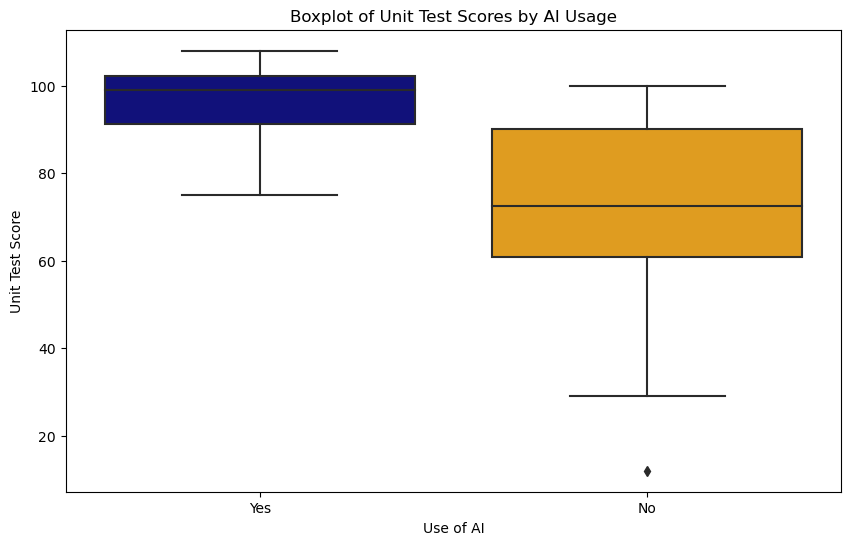

In [38]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv('data.csv', delimiter=';')

# Filter data for AI and No AI
data_ai = data[data['With AI'] == 'Yes']['Unit Test'].dropna()
data_no_ai = data[data['With AI'] == 'No']['Unit Test'].dropna()

# Calculate t-test between groups
t_stat, p_value = stats.ttest_ind(data_ai, data_no_ai)

# Calculate statistical metrics for AI
mean_ai = np.mean(data_ai)
median_ai = np.median(data_ai)
variance_ai = np.var(data_ai, ddof=1)
std_dev_ai = np.std(data_ai, ddof=1)
confidence_interval_ai = stats.norm.interval(0.95, loc=mean_ai, scale=std_dev_ai/np.sqrt(len(data_ai)))

# Calculate statistical metrics for No AI
mean_no_ai = np.mean(data_no_ai)
median_no_ai = np.median(data_no_ai)
variance_no_ai = np.var(data_no_ai, ddof=1)
std_dev_no_ai = np.std(data_no_ai, ddof=1)
confidence_interval_no_ai = stats.norm.interval(0.95, loc=mean_no_ai, scale=std_dev_no_ai/np.sqrt(len(data_no_ai)))

# Print the results
print(f"AI Group - Mean: {mean_ai}, Median: {median_ai}, Variance: {variance_ai}, Standard Deviation: {std_dev_ai}, 95% CI: {confidence_interval_ai}")
print(f"No AI Group - Mean: {mean_no_ai}, Median: {median_no_ai}, Variance: {variance_no_ai}, Standard Deviation: {std_dev_no_ai}, 95% CI: {confidence_interval_no_ai}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Plot the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='With AI', y='Unit Test', data=data, palette={'Yes': 'darkblue', 'No': 'orange'})
plt.title('Boxplot of Unit Test Scores by AI Usage')
plt.xlabel('Use of AI')
plt.ylabel('Unit Test Score')
plt.show()


In [41]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('data.csv', delimiter=';')
print("Columns in the dataset:", data.columns)

# Define a function to calculate total time spent
def calculate_total_time(row):
    total_time = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')  # Split based on space to separate time and binary indicator
            if len(parts) == 2:
                time_str = parts[0]  # Time is always the first part
            else:
                time_str = task  # Handle case where there's only a time value
            total_time += int(time_str)
    return total_time

# Apply function to calculate total time
data['Total_Time_Minutes'] = data.iloc[:, 3:11].apply(calculate_total_time, axis=1) / 60

print("Check if 'Total_Time_Minutes' is in data:", 'Total_Time_Minutes' in data.columns)

# Statistical Calculations and Plotting here


Columns in the dataset: Index(['Exam Set', 'With AI', 'Participant', 'Task 1', 'Task 2', 'Task 3',
       'Task 4', 'Task 5', 'Task 6', 'Task 7', 'Task 8', 'Task 9',
       'What is your age?', 'In what subject was your bachelor?',
       'How many years of developer experience do you have?',
       'How many years of experience do you have with Java?',
       'How many months is it since you coded in Java?',
       'How many years of experience do you have with Visual Studio Code?',
       'How much experience in years do you have in using an LLM(ChatGPT, CoPilot, Gemini)?',
       'Which operating system do you usually use', 'Task 1 points',
       'Task 2 points', 'Task 3 points', 'Task 4 points', 'Task 5 points',
       'Task 6 points', 'Task 7 points', 'Task 8 points', 'Task 9 points',
       'Total Points', 'Unit Test', 'Grade'],
      dtype='object')
Check if 'Total_Time_Minutes' is in data: True


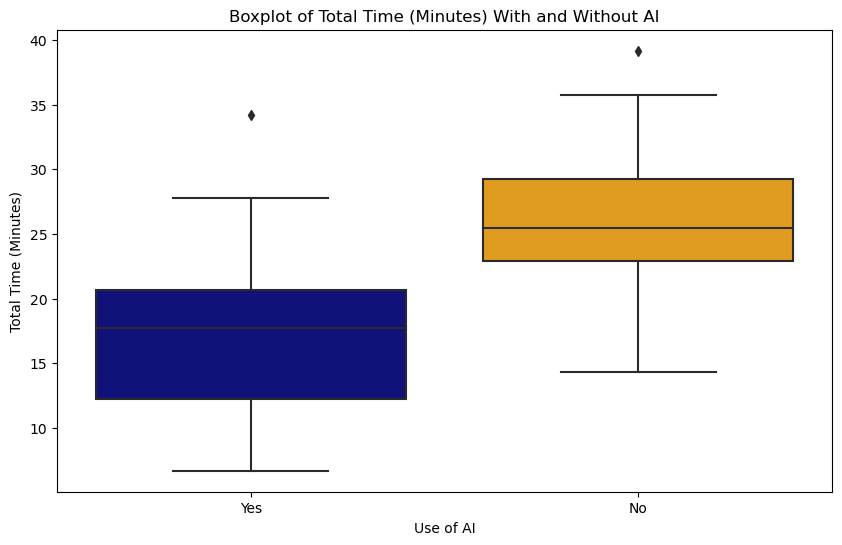

              mean  median        var       std  \
With AI                                           
No       25.709848  25.475  34.928668  5.910048   
Yes      17.502273  17.700  49.026674  7.001905   

                                           95% CI  
With AI                                            
No       (23.240241958708985, 28.179455010987986)  
Yes      (14.576416588839756, 20.428128865705702)  
T-test for Time: TtestResult(statistic=-4.201477779913769, pvalue=0.0001402696510802668, df=40.848162418301634)


In [43]:
# Group data by 'With AI'
grouped_time = data.groupby('With AI')['Total_Time_Minutes']

# Compute statistics for time
time_stats = grouped_time.agg(['mean', 'median', 'var', 'std'])
time_stats['95% CI'] = grouped_time.apply(lambda x: stats.norm.interval(0.95, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x))))

# T-tests for time
t_test_time = stats.ttest_ind(grouped_time.get_group('Yes'), grouped_time.get_group('No'), equal_var=False)

# Plotting the boxplot for time
plt.figure(figsize=(10, 6))
sns.boxplot(x='With AI', y='Total_Time_Minutes', data=data, palette={'Yes': 'darkblue', 'No': 'orange'})
plt.title('Boxplot of Total Time (Minutes) With and Without AI')
plt.xlabel('Use of AI')
plt.ylabel('Total Time (Minutes)')
plt.show()

print(time_stats)
print('T-test for Time:', t_test_time)

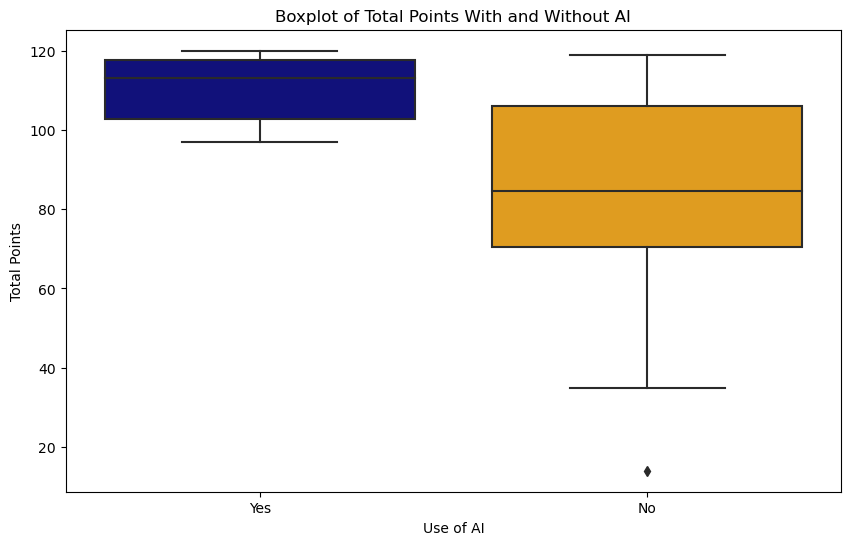

               mean  median         var        std  \
With AI                                              
No        84.000000    84.5  755.619048  27.488526   
Yes      110.818182   113.0   66.441558   8.151169   

                                           95% CI  
With AI                                            
No         (72.51348724578438, 95.48651275421562)  
Yes      (107.41208760916076, 114.22427602720286)  
T-test for Points: TtestResult(statistic=4.387213331252447, pvalue=0.00018718732526560336, df=24.6647241711822)


In [45]:
# Group data by 'With AI'
grouped_points = data.groupby('With AI')['Total Points']

# Compute statistics for points
points_stats = grouped_points.agg(['mean', 'median', 'var', 'std'])
points_stats['95% CI'] = grouped_points.apply(lambda x: stats.norm.interval(0.95, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x))))

# T-tests for points
t_test_points = stats.ttest_ind(grouped_points.get_group('Yes'), grouped_points.get_group('No'), equal_var=False)

# Plotting the boxplot for points
plt.figure(figsize=(10, 6))
sns.boxplot(x='With AI', y='Total Points', data=data, palette={'Yes': 'darkblue', 'No': 'orange'})
plt.title('Boxplot of Total Points With and Without AI')
plt.xlabel('Use of AI')
plt.ylabel('Total Points')
plt.show()

print(points_stats)
print('T-test for Points:', t_test_points)